In [2]:
import torch
loss_fn = torch.nn.CrossEntropyLoss()
import utils
import pandas as pd
import numpy as np

In [2]:
loss_fn

CrossEntropyLoss()

In [2]:
    X_train, y_train, X_val, y_val, X_test, y_test, num_examples = utils.load_data_malicious(
        client_id=str(1), device='cpu', type='random', dataset='synthetic', attack_type='DP_inverted_loss')


In [3]:
X_train.shape

torch.Size([1252, 3])

In [21]:
df_test = pd.read_csv(f"data/df_{'synthetic'}_{'random'}_test.csv")


In [22]:
df_test.shape

(7324, 4)

In [12]:
config_tests = {
    "diabetes": {
        "net": {
            "model_name": "net",
            "dataset": "diabetes",
            "checkpoint_folder": "checkpoints/diabetes/net/",
            "history_folder": "histories/diabetes/net/",
            "image_folder": "images/diabetes/net/",
            "input_dim": 21,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 3,
            "lambda2": 12,
            "lambda3": 1,
            "lambda4": 1.5,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder1_w": ["concept_mean_predictor", "concept_var_predictor"],
            "encoder2_w": ["concept_mean_z3_predictor", "concept_var_z3_predictor"],
            "encoder3_w": ["concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"], 
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor", "concept_mean_z3_predictor", "concept_var_z3_predictor", "concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "output_round": True,
        },
        "vcnet": {
            "model_name": "vcnet",
            "dataset": "diabetes",
            "checkpoint_folder": "checkpoints/diabetes/vcnet/",
            "history_folder": "histories/diabetes/vcnet/",
            "image_folder": "images/diabetes/vcnet/",
            "input_dim": 21,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 2,
            "lambda2": 10,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5, 
            "decoder_w": ["decoder"],
            "encoder_w": ["concept_mean_predictor", "concept_var_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor"],
            "output_round": True,
        },
        "predictor": {
            "model_name": "predictor",
            "dataset": "diabetes",
            "checkpoint_folder": "checkpoints/diabetes/predictor/",
            "history_folder": "histories/diabetes/predictor/",
            "image_folder": "images/diabetes/predictor/",
            "input_dim": 21,
            "output_dim": 2,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3"],
            "output_round": True,
        },
        "min" : np.array([0., 0., 0., 12., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.]),
        "max" : np.array([1., 1., 1., 98., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5., 30., 30., 1., 1., 13., 6., 8.]),
    },
    "breast": {
        "net": {
            "model_name": "net",
            "dataset": "breast",
            "checkpoint_folder": "checkpoints/breast/net/",
            "history_folder": "histories/breast/net/",
            "image_folder": "images/breast/net/",
            "input_dim": 30,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]), requires_grad=False),  # A CASOO
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 3,
            "lambda2": 12,
            "lambda3": 1,
            "lambda4": 1.5,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder1_w": ["concept_mean_predictor", "concept_var_predictor"],
            "encoder2_w": ["concept_mean_z3_predictor", "concept_var_z3_predictor"],
            "encoder3_w": ["concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"], 
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor", "concept_mean_z3_predictor", "concept_var_z3_predictor", "concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "output_round": False,
        },
        "vcnet": {
            "model_name": "vcnet",
            "dataset": "breast",
            "checkpoint_folder": "checkpoints/breast/vcnet/",
            "history_folder": "histories/breast/vcnet/",
            "image_folder": "images/breast/vcnet/",
            "input_dim": 30,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]), requires_grad=False),  # A CASOO
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 2,
            "lambda2": 10,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder_w": ["concept_mean_predictor", "concept_var_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor"],
            "output_round": False,
        },
        "predictor": {
            "model_name": "predictor",
            "dataset": "breast",
            "checkpoint_folder": "checkpoints/breast/predictor/",
            "history_folder": "histories/breast/predictor/",
            "image_folder": "images/breast/predictor/",
            "input_dim": 30,
            "output_dim": 2,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3"],
            "output_round": False,
        },
        "min" : np.array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
                                0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.602e-01,
                                7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
                                7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
                                7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02]),
        "max" : np.array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
                                4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
                                2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
                                7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
                                2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01]),
    },
    "synthetic": {
        "net": {
            "model_name": "net",
            "dataset": "synthetic",
            "checkpoint_folder": "checkpoints/synthetic/net/",
            "history_folder": "histories/synthetic/net/",
            "image_folder": "images/synthetic/net/",
            "input_dim": 3,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0]),
            "lambda1": 3,
            "lambda2": 12,
            "lambda3": 3,
            "lambda4": 20,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 70,
            "decoder_w": ["decoder"],
            "encoder1_w": ["concept_mean_predictor", "concept_var_predictor"],
            "encoder2_w": ["concept_mean_z3_predictor", "concept_var_z3_predictor"],
            "encoder3_w": ["concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3", "fc4", "fc5", "concept_mean_predictor", "concept_var_predictor"],
            "output_round": False,
        },
        "vcnet": {
            "model_name": "vcnet",
            "dataset": "synthetic",
            "checkpoint_folder": "checkpoints/synthetic/vcnet/",
            "history_folder": "histories/synthetic/vcnet/",
            "image_folder": "images/synthetic/vcnet/",
            "input_dim": 3,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0]),
            "lambda1": 2,
            "lambda2": 10,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder_w": ["concept_mean_predictor", "concept_var_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor"],
            "output_round": False,
        },
        "predictor": {
            "model_name": "predictor",
            "dataset": "synthetic",
            "checkpoint_folder": "checkpoints/synthetic/predictor/",
            "history_folder": "histories/synthetic/predictor/",
            "image_folder": "images/synthetic/predictor/",
            "input_dim": 3,
            "output_dim": 2,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3"],
            "output_round": False,
        },
        "min" : np.array([-5., -5., -5]),
        "max" : np.array([5., 5., 5.]),
        
    }
}


In [23]:
def min_max_scaler(X, dataset="diabetes", feature_range=(0, 1)):
    X_min = config_tests[dataset]['min']
    X_max = config_tests[dataset]['max']
    
    # Scale X using its own minimum and maximum, this will produce a normalized version of X
    X_std = (X - X_min) / (X_max - X_min)
    
    # Scale X_std to the feature_range
    min, max = feature_range
    X_scaled = X_std * (max - min) + min
    
    return X_scaled

In [15]:
dataset = "synthetic"
X_min = config_tests[dataset]['min']
X_max = config_tests[dataset]['max']

In [17]:
X_max

array([5., 5., 5.])

In [14]:
X = df_test.drop('Labels', axis=1)
y = df_test['Labels']

X_test = min_max_scaler(X.values, dataset='synthetic')

ValueError: operands could not be broadcast together with shapes (3662,2) (3,) 

In [18]:
X.shape

(3662, 2)

In [24]:
np.zeros((222, 2)).shape

(222, 2)

In [1]:
import os 
import argparse
import utils
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

n_clients_per_dataset = {
    'diabetes': 3,
    'breast': 3,
    'synthetic': 20
}
dataset = 'synthetic'
n_clients = n_clients_per_dataset[dataset]
data_type = 'random'
model = 'net'
n_epochs = 10

# main
# print model
# check gpu and set manual seed
device = utils.check_gpu(manual_seed=True)

# load data from all clients 
X_train_list, y_train_list, X_val_list, y_val_list = [], [], [], []
for client_id in range(1, 20+1):
    X_train, y_train, X_val, y_val, _, _, _ = utils.load_data(
        client_id=str(client_id), device=device, type=data_type, dataset=dataset)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_val_list.append(X_val)
    y_val_list.append(y_val)

# concatenate all data
X_train = torch.cat(X_train_list, dim=0)
y_train = torch.cat(y_train_list, dim=0)
X_val = torch.cat(X_val_list, dim=0)
y_val = torch.cat(y_val_list, dim=0)

# model and history folder
model_network = utils.models[model]
train_fn = utils.trainings[model]
evaluate_fn = utils.evaluations[model]
plot_fn = utils.plot_functions[model]
config = utils.config_tests[dataset][model]

# Model
model = model_network(config=config).to(device)

# Optimizer and Loss function
optimizer = torch.optim.SGD(model.parameters(), lr=config["learning_rate"], momentum=0.9)

# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Training
model, loss_train, loss_val, acc, acc_prime, acc_val = train_fn(
    model, loss_fn, optimizer, X_train, y_train, 
    X_val, y_val, n_epochs=n_epochs, save_best=True, print_info=False,config=config)

# Save model
if not os.path.exists(config['checkpoint_folder'] + f"{data_type}"):
    os.makedirs(config['checkpoint_folder'] + f"{data_type}")
model_path = config['checkpoint_folder'] + f"{data_type}/privacy_intrusive_CL.pth"
torch.save(model.state_dict(), model_path)



MPS is available


In [3]:
loss_train

[18.844743728637695,
 15.011959075927734,
 12.059072494506836,
 10.841259002685547,
 10.732672691345215,
 10.73654842376709,
 10.545574188232422,
 10.1520414352417,
 9.930130004882812,
 9.890220642089844]


Client all 
Minimum Loss occurred at round 6 with a loss value of 0.6929676532745361 
Maximum Accuracy occurred at round 1 with an accuracy value of 0.5003404021263123


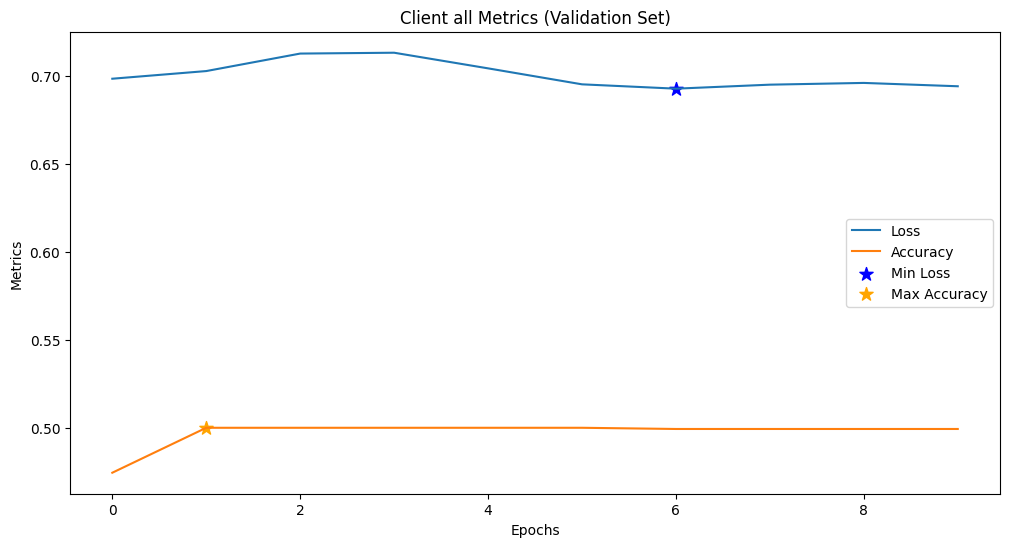

In [4]:
# Plot loss and accuracy using the previous lists
utils.plot_loss_and_accuracy_centralized(loss_val, acc_val, data_type=data_type, client_id="all", image_folder=config['image_folder'], show=False, name_fig="privacy_intrusive_CL")



In [8]:
    best_model_round=None
    model=model_network
    model_path=model_path
  
    # read arguments
    data_type=data_type
    dataset=dataset

    # check device
    
    # load data
    df_test = pd.read_csv(f"data/df_{dataset}_{data_type}_test.csv")
    if dataset == "breast":
        df_test = df_test.drop(columns=["Unnamed: 0"])
    #df_test = df_test.astype(int)
    # Dataset split
    X = df_test.drop('Labels', axis=1)
    y = df_test['Labels']

    # scale data
    X_test = utils.min_max_scaler(X.values, dataset=dataset)
    X_test = torch.Tensor(X_test).float().to(device)

    model = model(config).to(device)
    if best_model_round == None:
        model.load_state_dict(torch.load(model_path))
    else:
        model.load_state_dict(torch.load(config['checkpoint_folder'] + f"{data_type}/model_round_{best_model_round}.pth"))
    # evaluate
    model.eval()
    with torch.no_grad():
        if model.__class__.__name__ == "Net":
            H_test, x_reconstructed, q, p, H2_test, x_prime, q_prime, p_prime, y_prime = model(X_test, include=False)
        elif model.__class__.__name__ == "ConceptVCNet":
            H_test, x_reconstructed, q, y_prime, H2_test = model(X_test, include=False)
            x_prime = x_reconstructed

    X_test_rescaled = utils.inverse_min_max_scaler(X_test.detach().cpu().numpy(), dataset=dataset)
    x_prime_rescaled = utils.inverse_min_max_scaler(x_prime.detach().cpu().numpy(), dataset=dataset)
    if config["output_round"]:
        X_test_rescaled = np.round(X_test_rescaled)
        x_prime_rescaled = np.round(x_prime_rescaled)
        
    # visualize
    utils.visualize_examples(H_test, H2_test, x_prime_rescaled, y_prime, X_test_rescaled, data_type, dataset, config=config)
    # return H_



Visualizing the results of the best model (random) on the test set (synthetic)...


In [13]:
    print(f"\n\n\033[95mVisualizing the results of the best model ({data_type}) on the test set ({dataset})...\033[0m")
    if dataset == "diabetes":
        features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income']  
    elif dataset == "breast":
        features = ['radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'] 
    elif dataset == "synthetic":
        features = ['x1', 'x2','x3']
    else:
        # raise error: "Error: dataset not found in visualize_examples"
        raise ValueError("Error: dataset not found in visualize_examples")        
    

    j = 0
    if config["output_round"]:
        X_test_rescaled = np.rint(X_test_rescaled).astype(int)
        x_prime_rescaled = np.rint(x_prime_rescaled).astype(int)
    for i, s in enumerate(X_test_rescaled):
        print(f'Patient {i+1}: Diabetes level = {H_test[i].argmax()}')
        if j > 5:
            break
        if H2_test[i].argmax() == y_prime[i].argmax():
            j += 1
            print('--------------------------')
            print(f'Patient {j}: Diabetes level = {H_test[i].argmax()}')
            print(f'Features to change to make the Diabetes level = {H2_test[i].argmax()}')
            c = 0
            for el in X_test_rescaled[i] != x_prime_rescaled[i]:
                if el:
                    print(f'Feature: {features[c]} from {X_test_rescaled[i][c]:.4f} to {x_prime_rescaled[i][c]:.4f}')
                c += 1



Visualizing the results of the best model (random) on the test set (synthetic)...
Patient 1: Diabetes level = 0
Patient 2: Diabetes level = 0
Patient 3: Diabetes level = 0
Patient 4: Diabetes level = 0
Patient 5: Diabetes level = 0
Patient 6: Diabetes level = 0
Patient 7: Diabetes level = 0
Patient 8: Diabetes level = 0
Patient 9: Diabetes level = 0
Patient 10: Diabetes level = 0
Patient 11: Diabetes level = 0
Patient 12: Diabetes level = 0
Patient 13: Diabetes level = 0
Patient 14: Diabetes level = 0
Patient 15: Diabetes level = 0
Patient 16: Diabetes level = 0
Patient 17: Diabetes level = 0
Patient 18: Diabetes level = 0
Patient 19: Diabetes level = 0
Patient 20: Diabetes level = 0
Patient 21: Diabetes level = 0
Patient 22: Diabetes level = 0
Patient 23: Diabetes level = 0
Patient 24: Diabetes level = 0
Patient 25: Diabetes level = 0
Patient 26: Diabetes level = 0
Patient 27: Diabetes level = 0
Patient 28: Diabetes level = 0
Patient 29: Diabetes level = 0
Patient 30: Diabetes level

In [5]:
args = argparse.Namespace(
    dataset=dataset,
    data_type=data_type,
    model=model,
    n_epochs=n_epochs,
    n_clients=n_clients,
    device=device,
    model_path=model_path,
    config=config
)
# Evaluate the model on the test set
if model == 'predictor': # adjust this code
    y_test_pred, accuracy = utils.evaluation_central_test_predictor(args, best_model_round=None, model_path=model_path)
    print(f"Accuracy on test set: {accuracy}")
else:
    utils.evaluation_central_test(args, best_model_round=None, model=model_network, model_path=model_path, config=config)
    
    # Evaluate distance with all training sets
    utils.evaluate_distance(args, best_model_round=None, model_fn=model_network, model_path=model_path, config=config, spec_client_val=True, client_id=client_id, centralized=True, add_name="privacy_intrusive_CL")




Visualizing the results of the best model (random) on the test set (synthetic)...

Evaluation on General Testing Set - Server
Counterfactual validity: 0.0000
Counterfactual accuracy: 0.5019
Distance Evaluation - Counterfactual: Training Set
Mean distance with all training sets (proximity, hamming proximity, relative proximity): 4.5001, 2.9982, 0.6832
Mean distance with training set 1 (proximity, hamming proximity, relative proximity): 9.1725, 3.0000, 0.9970
Mean distance with training set 2 (proximity, hamming proximity, relative proximity): 9.1870, 3.0000, 0.9914
Mean distance with training set 3 (proximity, hamming proximity, relative proximity): 8.9732, 3.0000, 0.9830
Mean distance with training set 4 (proximity, hamming proximity, relative proximity): 9.7234, 3.0000, 0.9949
Mean distance with training set 5 (proximity, hamming proximity, relative proximity): 9.3256, 3.0000, 0.9972
Mean distance with training set 6 (proximity, hamming proximity, relative proximity): 8.8983, 2.9999

In [25]:
import os
import pandas as pd

# get all files
data = []
prox, hamm, rel_prox = [], [], []
for i in range(2):
    # read f"results_fold_{args.fold}.xlsx"
    d = pd.read_excel(f"results_fold_{i+1}.xlsx")
    prox.append(d["Proximity"].values)
    hamm.append(d["Hamming"].values)
    rel_prox.append(d["Rel. Proximity"].values)
    # delede file
    os.remove(f"results_fold_{i+1}.xlsx")

d["Proximity"] = np.mean(prox, axis=0)
d["Hamming"] = np.mean(hamm, axis=0)
d["Rel. Proximity"] = np.mean(rel_prox, axis=0)
d
# deep copy
d_std = d.copy()
d_std["Proximity"] = np.std(prox, axis=0)
d_std["Hamming"] = np.std(hamm, axis=0)
d_std["Rel. Proximity"] = np.std(rel_prox, axis=0)
d_std

,Label,Proximity,Hamming,Rel. Proximity
0,Validity,0.001933,NaN,NaN
1,Accuracy,0.001556,NaN,NaN
2,Loss,0.002894,NaN,NaN
3,Distance,0.027393,0.006695,0.002409
4,Distance 1,0.085903,0.005893,0.010930
5,Distance 2,0.021405,0.002593,0.008748
6,Distance 3,0.014474,0.010655,0.011889
7,Distance 4,0.025507,0.033428,0.010770
8,Distance 5,0.103348,0.026638,0.005482
9,Hamming D,0.015417,0.015417,NaN


In [23]:
prox[0]

array([5.92644989e-01, 7.20509171e-01, 5.64859390e+00, 4.02310228e+00,
       4.44290447e+00, 4.40226316e+00, 4.44988203e+00, 4.46204615e+00,
       4.38010359e+00, 9.29561520e+00, 2.74099960e+01, 4.77718592e+00,
       2.54596888e-03, 8.57237152e-01])

In [24]:
prox[1]

array([5.96511066e-01, 7.17397451e-01, 5.65438223e+00, 3.96831679e+00,
       4.27109861e+00, 4.44507313e+00, 4.47883081e+00, 4.41103268e+00,
       4.58679867e+00, 9.26478100e+00, 2.74823189e+01, 4.74904585e+00,
       2.92314946e-03, 8.53276756e-01])

In [18]:
import numpy as np
np.mean(prox, axis=0)

array([5.94578028e-01, 7.18953311e-01, 5.65148807e+00, 3.99570954e+00,
       4.35700154e+00, 4.42366815e+00, 4.46435642e+00, 4.43653941e+00,
       4.48345113e+00, 9.28019810e+00, 2.74461575e+01, 4.76311588e+00,
       2.73455917e-03, 8.55256954e-01])

In [7]:
d.keys()

Index(['Label', 'Proximity', 'Hamming', 'Rel. Proximity'], dtype='object')

In [5]:
data = pd.concat(data)
data = data.groupby(data.index).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [6]:
data

,Label,Proximity,Hamming,Rel. Proximity
0,Validity,0.592645,NaN,NaN
1,Accuracy,0.720509,NaN,NaN
2,Loss,5.648594,NaN,NaN
3,Distance,4.023102,2.798208,0.232727
4,Distance 1,4.442904,2.997171,0.278275
5,Distance 2,4.402263,3.015464,0.271788
6,Distance 3,4.449882,3.058086,0.300620
7,Distance 4,4.462046,3.062329,0.294492
8,Distance 5,4.380104,3.062235,0.294606
9,Hamming D,9.295615,9.295615,NaN


In [13]:
import pandas as pd
import utils
dataset = "synthetic"
data_type = "random"
df_test = pd.read_csv(f"data/df_{dataset}_{data_type}_test.csv")
if dataset == "breast":
    df_test = df_test.drop(columns=["Unnamed: 0"])
#df_test = df_test.astype(int)
# Dataset split
X = df_test.drop('Labels', axis=1)
y = df_test['Labels']
# scale data
X_test = utils.min_max_scaler(X.values, dataset=dataset)


ValueError: operands could not be broadcast together with shapes (7324,3) (2,) 

In [8]:
df_test.head()

,x1,x2,x3,Labels
0,2.607850,0.612772,-6.688011,1.0
1,3.925590,0.393422,-6.883833,1.0
2,1.335297,0.357747,-5.267648,1.0
3,3.172222,0.552008,-5.797770,1.0
4,4.402302,0.754742,-5.583855,1.0


In [14]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rmd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import argparse
from sklearn.cluster import KMeans
import copy
import warnings
warnings.filterwarnings('ignore')



# In[55]:
# get input arguments

n_clients = 10
seed = 1
synthetic_features = 2

print(f"\n\n\033[33mData creation\033[0m")
print(f"Number of clients: {n_clients}")
print(f"Random seed: {seed}")

# Load data
# Diabeters
df_train = pd.read_csv('data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_train = df_train.rename(columns={'Diabetes_binary': 'Labels'})
# Breast cancer
X_breast = pd.read_csv('data/X_breast.csv')
y_breast = pd.read_csv('data/y_breast.csv')
y_breast['Diagnosis'] = y_breast['Diagnosis'].map({'M': 1, 'B': 0})
# add labels to X_breast with the same name as in df_train
df_train_breast = pd.DataFrame(X_breast)
df_train_breast['Labels'] = y_breast['Diagnosis']

print(f"Diabetes dataset: {df_train.shape}")
print(f"Breast cancer dataset: {df_train_breast.shape}")


# In[56]:


# find min and max values for each feature
XX = df_train.drop('Labels', axis=1)
min_values_diabetes = XX.min().values
max_values_diabetes = XX.max().values
print(f"Min values diabetes: {min_values_diabetes}")
print(f"Max values diabetes: {max_values_diabetes}")

XXX = df_train_breast.drop('Labels', axis=1)
XXX = XXX.drop(columns=["Unnamed: 0"])
min_values_breast = XXX.min().values
max_values_breast = XXX.max().values
print(f"Min values: {min_values_breast}")
print(f"Max values: {max_values_breast}")


# ### Random Subdivision 
# 

# In[57]:


# N institutions (5% out for testing)
N = n_clients

def random_split(df, N, file_prefix='df_diabetes', seed=1):
    """
    Splits a DataFrame into N parts and saves each part as a CSV file.

    Parameters:
    df (pd.DataFrame): The DataFrame to split.
    N (int): Number of parts to split the DataFrame into.
    file_prefix (str): Prefix for the output file names.
    """
    # Shuffle the DataFrame
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

    # # Leave out 5% for testing
    # df_train, df_test = train_test_split(df_shuffled, test_size=0.15, random_state=1)
    # df_test.to_csv(file_prefix + '_random_test.csv', index=False)
    # print(f'Saved: {file_prefix}_random_test.csv of shape {df_test.shape}')

    # Split the DataFrame into N parts
    df_splits = np.array_split(df_shuffled, N)

    # Save each part as a CSV file
    test_splits = []
    for i, split in enumerate(df_splits, start=1):
        # Leave out 5% for testing
        df_train, df_test = train_test_split(split, test_size=0.15, random_state=seed)
        test_splits.append(df_test)
        df_test.to_csv(file_prefix + f'_random_test_{i}.csv', index=False)
        print(f'Saved: {file_prefix}_random_test_{i}.csv of shape {df_test.shape}')
        # Save the training split
        df_train.to_csv(f'{file_prefix}_random_{i}.csv', index=False)
        print(f'Saved: {f'{file_prefix}_random_{i}.csv'} of shape {df_train.shape}')
    
    # concatenate the test split of each part
    df_test = pd.concat(test_splits)
    df_test.to_csv(file_prefix + '_random_test.csv', index=False)
    print(f'Saved: {file_prefix}_random_test.csv of shape {df_test.shape}\n')

random_split(df_train, N, file_prefix='data/df_diabetes', seed=seed)
random_split(df_train_breast, N, file_prefix='data/df_breast', seed=seed)


# ### Cluster based Subdivision

# In[59]:
# Function to calculate Euclidean distances between centroids
def centroid_distances(centroids0, centroids1):
    N = len(centroids0)
    distances = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distances[i, j] = np.linalg.norm(centroids0[i] - centroids1[j])
    return distances

# Function to calculate centroids
def calculate_centroids(df, labels):
    N = len(np.unique(labels))
    centroids = []
    for i in range(N):
        centroids.append(df[labels == i].mean().to_numpy())
    return centroids

def cluster_by_class_split(df, N, file_prefix='df_diabetes', seed=1):
    """
    In this code, distances will be a matrix where the element at [i, j] represents
    the distance between the i-th cluster of class 0 and the j-th cluster of class 1.
    The final matrix will be a N x N matrix, not simmetrical in general.
    The following result means that for the first cluster of class 0, the second cluster 
    of class 1 is the closest one. For the second cluster of class 0, the third cluster of
    class 1 is the closest one. And so on.
    array([[22.52661847, 16.58598092, 30.50548191],
       [ 4.33080647, 32.17891945, 25.41195157],
       [27.11059815, 19.7759446 ,  8.12520036]])
    """

    # # Leave out 5% for testing
    # df_train, df_test = train_test_split(df_train, test_size=0.15, random_state=1)
    # df_test.to_csv(file_prefix + '_2cluster_test.csv', index=False)
    # print(f'Saved: {file_prefix}_2cluster_test.csv of shape {df_test.shape}')

    # Splitting the dataset by class
    df_train_0 = df[df['Labels'] == 0].drop('Labels', axis=1)
    df_train_1 = df[df['Labels'] == 1].drop('Labels', axis=1)
    # KMeans clustering
    kmeans_0 = KMeans(n_clusters=N, random_state=1).fit(df_train_0)
    kmeans_1 = KMeans(n_clusters=N, random_state=1).fit(df_train_1)
    # Calculating centroids
    centroids_0 = calculate_centroids(df_train_0, kmeans_0.labels_)
    centroids_1 = calculate_centroids(df_train_1, kmeans_1.labels_)
    # Calculating distances
    distance_matrix = centroid_distances(centroids_0, centroids_1)  

    # Pairing clusters
    pairs = pair_clusters(distance_matrix)

    # create the N clusters
    i = 1
    test_splits = []
    for c0,c1 in pairs:
        df_0 = df[df['Labels'] == 0][kmeans_0.labels_ == c0]
        df_1 = df[df['Labels'] == 1][kmeans_1.labels_ == c1]
        # merge the clusters
        df_merge = pd.concat([df_0, df_1])
        # randomize the order of the rows
        df_merge = df_merge.sample(frac=1).reset_index(drop=True)
        # Leave out 15% for testing
        df_train, df_test = train_test_split(df_merge, test_size=0.15, random_state=seed)
        test_splits.append(df_test)
        df_test.to_csv(file_prefix + f'_2cluster_test_{i}.csv', index=False)
        print(f'Saved: {file_prefix}_2cluster_test_{i}.csv of shape {df_test.shape}')
        # save training split
        df_train.to_csv(f'{file_prefix}_2cluster_{i}.csv', index=False)
        print(f'Saved: {f'{file_prefix}_2cluster_{i}.csv'} of shape {df_train.shape} pairs: {c0} and {c1}')
        i += 1
    
    # concatenate the test split of each part
    df_test = pd.concat(test_splits)
    df_test.to_csv(file_prefix + '_2cluster_test.csv', index=False)
    print(f'Saved: {file_prefix}_2cluster_test.csv of shape {df_test.shape}\n')

def pair_clusters(dist_matrix):
    distances_copy = copy.deepcopy(dist_matrix)
    pairs = []
    # cycle
    while distances_copy.size > 0:
        # Find the minimum value and its column index
        min_value = np.min(distances_copy)
        min_col_index = np.argmin(np.min(distances_copy, axis=0))
        min_row_index = np.argmin(distances_copy[:, min_col_index])

        # identify the real position 
        ind = np.where(dist_matrix == min_value) #print("Minimum value:", min_value)#print("Column index of minimum value:", ind[1])#print("Row index of minimum value:", ind[0])

        # record pairing 
        pairs.append((ind[1].item(0), ind[0].item(0)))  # (cluster_{min_col_index}_0, cluster_{min_row_index}_1)

        # remove the paired clusters from further consideration
        distances_copy = np.delete(distances_copy, min_row_index, axis=0)  # remove row
        distances_copy = np.delete(distances_copy, min_col_index, axis=1)  # remove column

    return pairs

cluster_by_class_split(df_train, N, file_prefix='data/df_diabetes', seed=seed)
cluster_by_class_split(df_train_breast, N, file_prefix='data/df_breast', seed=seed)


# In[63]:


# N institutions - clusters _ OLD VERSION
def cluster_split(df, N, file_prefix='df_diabetes', seed=1):
    """
    Splits a DataFrame into N clusters and saves each cluster as a CSV file.

    Parameters:
    df (pd.DataFrame): The DataFrame to cluster.
    N (int): Number of clusters to form.
    file_prefix (str): Prefix for the output file names.
    """

    # # Leave out 5% for testing
    # df_train, df_test = train_test_split(df, test_size=0.15, random_state=1)
    # df_test.to_csv(file_prefix + '_cluster_test.csv', index=False)
    # print(f'Saved: {file_prefix}_cluster_test.csv of shape {df_test.shape}')

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=N, random_state=seed)
    clusters = kmeans.fit_predict(df)

    # Split the DataFrame based on clusters
    test_splits = []   
    for i in range(N):
        cluster_df = df[clusters == i]
        # Leave out 5% for testing
        df_train, df_test = train_test_split(cluster_df, test_size=0.15, random_state=seed)
        df_test.to_csv(file_prefix + f'_cluster_test_{i+1}.csv', index=False)
        test_splits.append(df_test)
        print(f'Saved: {file_prefix}_cluster_test_{i+1}.csv of shape {df_test.shape}')
        # split train
        df_train.to_csv(f'{file_prefix}_cluster_{i+1}.csv', index=False)
        print(f'Saved: {f'{file_prefix}_cluster_{i+1}.csv'} of shape {df_train.shape}')
    
    # concatenate the test split of each part
    df_test = pd.concat(test_splits)
    df_test.to_csv(file_prefix + '_cluster_test.csv', index=False)
    print(f'Saved: {file_prefix}_cluster_test.csv of shape {df_test.shape}\n')


cluster_split(df_train, N, file_prefix='data/df_diabetes', seed=seed)
cluster_split(df_train_breast, N, file_prefix='data/df_breast', seed=seed)


# ## Data Poisoning - Attacker datasets

# ### Random

# In[65]:


N_attackers = 2

# find min and max values for each feature
min_values_diabetes = df_train.min().values
max_values_diabetes = df_train.max().values
min_values_breast = df_train_breast.min().values
max_values_breast = df_train_breast.max().values

# example for both datasets 
df_diabetes = pd.read_csv('data/df_diabetes_random_1.csv')
df_breast = pd.read_csv('data/df_breast_random_1.csv')

def create_attackers_random(df, N_attackers, min, max, file_prefix='df_diabetes_random', seed=1):
    """
    Create N_attackers attackers with random values between min and max for each feature.

    Parameters:
    df (pd.DataFrame): DataFrame to use as a template for the attackers.
    N_attackers (int): Number of attackers to create.
    min (np.array): Minimum values for each feature.
    max (np.array): Maximum values for each feature.
    file_prefix (str): Prefix for the output file names.

    """
    np.random.seed(seed)

    for i in range(N_attackers):
        attacker_df = pd.DataFrame(np.random.uniform(min, max, size=(df.shape[0], df.shape[1])), columns=df.columns)
        # make 'Labels' column binary
        attacker_df['Labels'] = attacker_df['Labels'].apply(lambda x: 1 if x >= 0.5 else 0)
        if 'diabetes' in file_prefix:
            # make all features equal to the closer integer
            attacker_df = attacker_df.round().astype(np.float64)
        attacker_df.to_csv(f'{file_prefix}_DP_random_{i+1}.csv', index=False)
        print(f'Saved: {file_prefix}_DP_random_{i+1}.csv of shape {attacker_df.shape}')

create_attackers_random(df_diabetes, N_attackers, min_values_diabetes, max_values_diabetes, file_prefix='data/df_diabetes_random', seed=seed)
create_attackers_random(df_breast, N_attackers, min_values_breast, max_values_breast, file_prefix='data/df_breast_random', seed=seed)



# ### Label-Flipping

# In[68]:


# flip the labels
def flip_client(path):
    client = pd.read_csv(path + '.csv')
    client['Labels'] = 1 - client['Labels']
    # split the path
    path = path.split('_')
    new_path = path[0] + '_' + path[1] + '_' + path[2] + '_DP_flip_' + path[3]
    client.to_csv(new_path + '.csv', index=False)
    print(f"Saved: {new_path}.csv of shape {client.shape}")

flip_client('data/df_breast_random_1')
flip_client('data/df_breast_random_2')
flip_client('data/df_diabetes_random_1')
flip_client('data/df_diabetes_random_2')
flip_client('data/df_breast_2cluster_1')
flip_client('data/df_breast_2cluster_2')
flip_client('data/df_diabetes_2cluster_1')
flip_client('data/df_diabetes_2cluster_2')
flip_client('data/df_breast_cluster_1')
flip_client('data/df_breast_cluster_2')
flip_client('data/df_diabetes_cluster_1')
flip_client('data/df_diabetes_cluster_2')


# ### Inverted Loss

# In[71]:


# flip the labels
def inverted_client(path):
    client = pd.read_csv(path + '.csv')
    # split the path
    path = path.split('_')
    new_path = path[0] + '_' + path[1] + '_' + path[2] + '_DP_inverted_loss_' + path[3]
    client.to_csv(new_path + '.csv', index=False)
    print(f"Saved: {new_path}.csv of shape {client.shape}")

inverted_client('data/df_breast_random_1')
inverted_client('data/df_breast_random_2')
inverted_client('data/df_diabetes_random_1')
inverted_client('data/df_diabetes_random_2')
inverted_client('data/df_breast_2cluster_1')
inverted_client('data/df_breast_2cluster_2')
inverted_client('data/df_diabetes_2cluster_1')
inverted_client('data/df_diabetes_2cluster_2')
inverted_client('data/df_breast_cluster_1')
inverted_client('data/df_breast_cluster_2')
inverted_client('data/df_diabetes_cluster_1')
inverted_client('data/df_diabetes_cluster_2')




## Synthetic dataset
N_clients = 10
N_samples = 20000
ratio = 0.2

def create_points(n):
    # set seed for reproducibility
    np.random.seed(seed)                                            ### IT WAS 42
    data = np.random.uniform(-5, 5, (n, 2))
    data = data[(((data[:, 0] > 0.2).astype(float) + (data[:, 0] < -0.2).astype(float)) * ((data[:, 1] > 0.2).astype(float) + (data[:, 1] < -0.2).astype(float))).astype(bool)]
    y = np.zeros(data.shape[0])
    # select the one above the line y = -x
    filter = data[:, 1] > -data[:, 0]
    y[filter] = 1
    return data, y

def select_points(data, m, n):
    # check if m and n are both positive or both negative
    if (m > 0 and n < 0) or (m < 0 and n > 0):
        a = data[(data[:,1] > m*data[:,0]) & (data[:,1] > n*data[:,0])]
        b = data[(data[:,1] < n*data[:,0]) & (data[:,1] < m*data[:,0])]
    else:
        a = data[(data[:,1] > m*data[:,0]) & (data[:,1] < n*data[:,0])]
        b = data[(data[:,1] > n*data[:,0]) & (data[:,1] < m*data[:,0])]
    return np.concatenate((a, b))

def divide_space_2f(data, n):
    client_dict = {}
    angle = 180/n
    angles = np.arange(0, 179, angle)
    # apply the same function to each element of the list
    m = np.tan(np.radians(angles))
    # select a random element in m
    np.random.seed(seed)                                           ### IT WAS 42           
    y_div = np.random.choice(m, 1, replace=False)
    print(y_div)
    for i in range(n-1):
        client_dict[i] = {}
        client_dict[i]['x'] = select_points(data, m[i], m[i+1])
        indexes = np.arange(client_dict[i]['x'].shape[0])
        rmd.shuffle(indexes)
        client_dict[i]['x'] = client_dict[i]['x'][indexes]
        client_dict[i]['y'] = np.zeros(len(client_dict[i]['x']))
        filter = client_dict[i]['x'][:, 1] > y_div*client_dict[i]['x'][:, 0]
        client_dict[i]['y'][filter] = 1
    client_dict[n-1] = {}
    client_dict[n-1]['x'] = select_points(data,  m[n-1], m[0])
    indexes = np.arange(client_dict[n-1]['x'].shape[0])
    rmd.shuffle(indexes)
    client_dict[n-1]['x'] = client_dict[n-1]['x'][indexes]
    client_dict[n-1]['y'] = np.zeros(len(client_dict[n-1]['x']))
    filter = client_dict[n-1]['x'][:, 1] > y_div*client_dict[n-1]['x'][:, 0]
    client_dict[n-1]['y'][filter] = 1
    return client_dict

def divide_space(data, n, cluster=0):
    client_dict = {}
    angle = 180/n
    angles = np.arange(0, 179, angle)
    # apply the same function to each element of the list
    m = np.tan(np.radians(angles))
    # select a random element in m
    np.random.seed(seed)                                           ### IT WAS 42   
    y_div = np.random.choice(m, 1, replace=False)
    print(y_div)
    for i in range(cluster*n, cluster*n+n-1):
        client_dict[i] = {}
        client_dict[i]['x'] = select_points(data, m[i-cluster*n], m[i+1-cluster*n])
        indexes = np.arange(client_dict[i]['x'].shape[0])
        rmd.shuffle(indexes)
        client_dict[i]['x'] = client_dict[i]['x'][indexes]
        client_dict[i]['y'] = np.zeros(len(client_dict[i]['x']))
        filter = client_dict[i]['x'][:, 1] > y_div*client_dict[i]['x'][:, 0]
        client_dict[i]['y'][filter] = 1
        if cluster == 0:
            size = int(client_dict[i]['x'].shape[0]/2)
            random_1 = np.random.uniform(-7, -6, size)
            random_2 = np.random.uniform(6, 7, client_dict[i]['x'].shape[0]-size)
            random = np.concatenate((random_1, random_2), axis=0).reshape(-1, 1)
            client_dict[i]['x'] = np.concatenate((client_dict[i]['x'], random), axis=-1)
        elif cluster == 1:
            size = int(client_dict[i]['x'].shape[0]/2)
            random_1 = np.random.uniform(-7, -6, size)
            random_2 = np.random.uniform(6, 7, client_dict[i]['x'].shape[0]-size)
            random = np.concatenate((random_1, random_2), axis=0).reshape(-1, 1)
            client_dict[i]['x'] = np.concatenate((random, client_dict[i]['x']), axis=-1)
    client_dict[cluster*n+n-1] = {}
    client_dict[cluster*n+n-1]['x'] = select_points(data,  m[n-1], m[0])
    indexes = np.arange(client_dict[cluster*n+n-1]['x'].shape[0])
    rmd.shuffle(indexes)
    client_dict[cluster*n+n-1]['x'] = client_dict[cluster*n+n-1]['x'][indexes]
    client_dict[cluster*n+n-1]['y'] = np.zeros(len(client_dict[cluster*n+n-1]['x']))
    filter = client_dict[cluster*n+n-1]['x'][:, 1] > y_div*client_dict[cluster*n+n-1]['x'][:, 0]
    client_dict[cluster*n+n-1]['y'][filter] = 1
    if cluster == 0:
        size = int(client_dict[cluster*n+n-1]['x'].shape[0]/2)
        random_1 = np.random.uniform(-7, -6, size)
        random_2 = np.random.uniform(6, 7, client_dict[cluster*n+n-1]['x'].shape[0]-size)
        random = np.concatenate((random_1, random_2), axis=0).reshape(-1, 1)
        client_dict[cluster*n+n-1]['x'] = np.concatenate((client_dict[cluster*n+n-1]['x'], random), axis=-1)
    elif cluster == 1:
        size = int(client_dict[cluster*n+n-1]['x'].shape[0]/2)
        random_1 = np.random.uniform(-7, -6, size)
        random_2 = np.random.uniform(6, 7, client_dict[cluster*n+n-1]['x'].shape[0]-size)
        random = np.concatenate((random_1, random_2), axis=0).reshape(-1, 1)
        client_dict[cluster*n+n-1]['x'] = np.concatenate((random, client_dict[cluster*n+n-1]['x']), axis=-1)
    return client_dict

data, y = create_points(int(N_samples*(1-ratio)))
data_test, y_test = create_points(int(N_samples*ratio))

exp = select_points(data, 2, 3)
exp_test = select_points(data_test, 2, 3)

if synthetic_features == 2:
    data_dict = divide_space_2f(data, N_clients)
    data_dict_test = divide_space_2f(data_test, N_clients)
    # save training
    for key in data_dict:
        df = np.concatenate((data_dict[key]['x'], data_dict[key]['y'].reshape(-1, 1)), axis=1)
        df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
        print(df.shape)
        df.to_csv('./df_synthetic_random_{}.csv'.format(key+1), index=False)
    # save test
    list_df = []
    for key in data_dict_test:
        df = np.concatenate((data_dict_test[key]['x'], data_dict_test[key]['y'].reshape(-1, 1)), axis=1)
        df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
        print(df.shape)
        list_df.append(df)
    df = pd.concat(list_df)
    df.to_csv('./df_synthetic_random_test.csv', index=False)
    # save single datasets for testing
    for key in data_dict_test:
        df = np.concatenate((data_dict_test[key]['x'], data_dict_test[key]['y'].reshape(-1, 1)), axis=1)
        df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
        print(df.shape)
        df.to_csv('./df_synthetic_random_test_{}.csv'.format(key+1), index=False)
        
    ## Poisoning attack
    # random data
    y_rand = y.copy()
    np.random.shuffle(y_rand)
    random_1 = {'x': data[:1500], 'y': y_rand[:1500]}
    
    y_rand = y.copy()
    np.random.shuffle(y_rand)
    random_1_test = {'x': data[1500:1870], 'y': y_rand[1500:1870]}
    
    y_rand = y.copy()
    np.random.shuffle(y_rand)
    random_2 = {'x': data[2000:3500], 'y': y_rand[2000:3500]}

    y_rand = y.copy()
    np.random.shuffle(y_rand)
    random_2_test = {'x': data[3500:3870], 'y': y_rand[3500:3870]}

    # label flip attack
    flipped_1 =  {'x': data_dict[9]['x'], 'y': 1-data_dict[9]['y']}
    flipped_1_test = {'x': data_dict_test[2]['x'], 'y': 1-data_dict_test[9]['y']}
    flipped_2 =  {'x': data_dict[2]['x'], 'y': 1-data_dict[2]['y']}
    flipped_2_test = {'x': data_dict_test[2]['x'], 'y': 1-data_dict_test[2]['y']}

    # inverted loss - same as honest
    inverted_1 =  {'x': data_dict[1]['x'], 'y': data_dict[1]['y']}
    inverted_1_test = {'x': data_dict_test[1]['x'], 'y': data_dict_test[1]['y']}
    inverted_2 =  {'x': data_dict[2]['x'], 'y': data_dict[2]['y']}
    inverted_2_test = {'x': data_dict_test[2]['x'], 'y': data_dict_test[2]['y']}

    # list
    poisoned_data = [random_1, random_2, flipped_1, flipped_2, inverted_1, inverted_2]

    # save poisoned datasets
    list_name = ['DP_random_1', 'DP_random_2', 'DP_flip_1', 'DP_flip_2', 'DP_inverted_loss_1', 'DP_inverted_loss_2']
    for i in range(len(poisoned_data)):
        df = np.concatenate((poisoned_data[i]['x'], poisoned_data[i]['y'].reshape(-1, 1)), axis=1)
        df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
        df.to_csv('./df_synthetic_random_{}.csv'.format(list_name[i]), index=False)



Data creation
Number of clients: 10
Random seed: 1
Diabetes dataset: (70692, 22)
Breast cancer dataset: (569, 32)
Min values diabetes: [ 0.  0.  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  1.  1.]
Max values diabetes: [ 1.  1.  1. 98.  1.  1.  1.  1.  1.  1.  1.  1.  1.  5. 30. 30.  1.  1.
 13.  6.  8.]
Min values: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
Max values: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Saved: data/df_diabetes_random_t

In [12]:

model = utils.models["net"]
config = utils.config_tests["breast"]["net"]
model = model(config=config).to("cpu")

In [33]:
from collections import OrderedDict
import copy
class MP_training:
    def __init__(self, model, attack_type, n_epochs):
        self.model = model
        self.attack_type = attack_type
        self.n_epochs = n_epochs
        self.saved_models = {}

    def get_parameters(self):
        params = []
        for k, v in self.model.state_dict().items():
            if k == 'cid':
                params.append(v.cpu().numpy())
                continue
            if k == 'mask' or k=='binary_feature':
                params.append(v.cpu().numpy())
                continue
            # Mimic the actual parameter range by observing the mean and std of each parameter
            elif self.attack_type == "MP_random":
                v = v.cpu().numpy()
                params.append(np.random.normal(loc=np.mean(v), scale=np.std(v), size=v.shape).astype(np.float32))
            # Introducing random noise to the parameters
            elif self.attack_type == "MP_noise":
                v = v.cpu().numpy()
                params.append(v + np.random.normal(0, 0.4*np.std(v), v.shape).astype(np.float32))
            # Gradient-based attack - flip the sign of the gradient and scale it by a factor [adaptation of Fall of Empires]
            elif self.attack_type == "MP_gradient":
                if self.config["current_epoch"] == 1:
                    params.append(v.cpu().numpy()) # Use the original parameters for the first round
                    continue
                else:
                    # epsilon = 0.01
                    prev_v = self.saved_models.get(self.config["current_epoch"] - 1).get(k).cpu().numpy()
                    current_v = v.cpu().numpy()
                    #manipulated_param = current_v - epsilon * (current_v - prev_v)
                    manipulated_param = prev_v
                    params.append(manipulated_param.astype(np.float32))
        return params

    def set_parameters(self, parameters):
        params_dict = zip(self.model.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
        self.model.load_state_dict(state_dict, strict=True)

    def fit(self):
        model_list = []
        for epoch in range(self.n_epochs):
            # update the current model
            self.set_parameters(self.get_parameters())

            # if MP_graidnet, save the model
            if self.attack_type == "MP_gradient":
                self.saved_models[epoch] = {k: v.clone() for k, v in self.model.state_dict().items()}
                # delede previous 3-rounds model
                if epoch > 3:
                    del self.saved_models[epoch-3]
            
            # add to the list
            model_list.append(copy.deepcopy(self.model))
            
        return model_list



In [34]:
mp = MP_training(model, "MP_random", 5)
model_trained = mp.fit()

In [35]:
model_trained[0].fc1.weight

Parameter containing:
tensor([[ 0.0574, -0.0790,  0.0375,  ...,  0.1406,  0.0267, -0.0749],
        [ 0.0066, -0.0503, -0.0419,  ..., -0.0429, -0.0419,  0.0111],
        [-0.0578, -0.0308, -0.0149,  ...,  0.0336, -0.0669, -0.0144],
        ...,
        [-0.1358, -0.0078,  0.0601,  ...,  0.0148,  0.0421,  0.0169],
        [-0.0427, -0.0003, -0.1378,  ...,  0.0571, -0.0567, -0.0809],
        [ 0.0140,  0.0538,  0.0275,  ...,  0.0247,  0.0863,  0.0681]],
       requires_grad=True)

In [36]:
model_trained[1].fc1.weight

Parameter containing:
tensor([[ 0.0613,  0.0994, -0.0140,  ...,  0.0462, -0.0616, -0.0085],
        [ 0.0651,  0.0470,  0.0190,  ...,  0.0143, -0.0280, -0.1229],
        [ 0.0308,  0.0444, -0.0006,  ..., -0.0948,  0.0338, -0.0565],
        ...,
        [-0.0119,  0.0033,  0.1546,  ...,  0.0654,  0.0097,  0.0943],
        [-0.0068,  0.0875,  0.0412,  ...,  0.0800,  0.0498, -0.0810],
        [-0.0596, -0.0343, -0.0911,  ..., -0.0174, -0.0143,  0.0634]],
       requires_grad=True)

In [37]:
model_trained[2].fc1.weight

Parameter containing:
tensor([[ 6.0748e-02, -7.5763e-02, -4.5981e-02,  ..., -4.4365e-05,
          5.2839e-02, -1.9624e-03],
        [-1.9877e-03,  1.5958e-02, -7.3454e-02,  ...,  5.0070e-02,
          8.5029e-02,  1.1023e-02],
        [ 2.4371e-02,  2.7564e-02, -1.4155e-02,  ..., -1.2788e-02,
         -1.1512e-01,  3.2124e-02],
        ...,
        [-2.5707e-02, -2.4504e-02,  4.3426e-02,  ...,  1.4881e-01,
          5.4790e-03, -3.5408e-02],
        [ 2.6266e-02,  1.2828e-01,  7.2179e-02,  ..., -1.4118e-01,
         -4.3075e-02,  1.5520e-02],
        [ 8.8693e-02,  2.0969e-02, -4.2442e-02,  ...,  1.3469e-02,
          4.8025e-02, -6.5458e-02]], requires_grad=True)

In [14]:
import utils
import numpy as np
import pandas as pd
import random as rmd
import os
import copy
import torch
import json
import matplotlib.pyplot as plt
import seaborn as sns

dataset = "breast"
model = "net"
attack_type = "MP_random"
n_attackers = 2
rounds = 25
data_type = "2cluster"

# federated learning - server
config = utils.config_tests[dataset][model]
# get all files
data = []
plot_metrics = []
prox, hamm, rel_prox = [], [], []
for i in range(3):
    # # read
    # d = pd.read_excel(f"results_fold_{i+1}.xlsx")
    # prox.append(d["Proximity"].values)
    # hamm.append(d["Hamming"].values)
    # rel_prox.append(d["Rel. Proximity"].values)
    # # delede file
    # os.remove(f"results_fold_{i+1}.xlsx")
    # read json
    with open(config['history_folder'] + f'server_{data_type}/metrics_{rounds}_{i}.json', 'r') as f:
        plot_metrics.append(json.load(f))
        f.close()

Mean Metrics: {'loss': array([0.68209826, 0.68296433, 0.68250006, 0.67925453, 0.67857303,
       0.6782807 , 0.67787635, 0.67735545, 0.67702336, 0.67613616,
       0.67417466, 0.67272733, 0.67164329, 0.67053404, 0.67169365,
       0.67187023, 0.67032969, 0.66962029, 0.66726834, 0.66832632,
       0.66911282, 0.66932382, 0.67019145, 0.67192238, 0.67211247]), 'accuracy': array([0.67283952, 0.67283952, 0.67283952, 0.67283952, 0.67283952,
       0.67283952, 0.67283952, 0.67283952, 0.67283952, 0.67283952,
       0.67283952, 0.67283952, 0.67283952, 0.67283952, 0.67283952,
       0.67283952, 0.67283952, 0.67283952, 0.67283952, 0.67283952,
       0.67283952, 0.67283952, 0.67283952, 0.67283952, 0.67283952]), 'validity': array([0.01234568, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.  

/var/folders/zx/c94b09b50v31fk6qp9h3h1cw0000gn/T/ipykernel_99522/196800401.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.lineplot(x="Iteration", y="Value", hue="Variable", style="Variable",


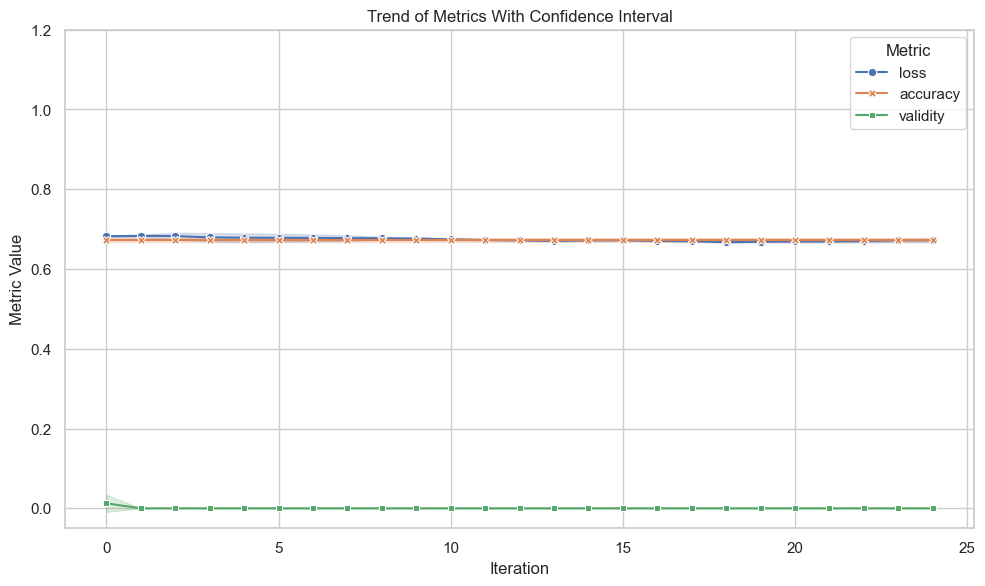

In [25]:
def plot_mean_std_metrics(plot_metrics, name):
    # Initialize dictionaries to store the mean and std of each variable
    mean_metrics = {}
    std_metrics = {}

    # Initialize keys in mean and std dictionaries
    for key in plot_metrics[0]:
        mean_metrics[key] = []
        std_metrics[key] = []

    # Calculate mean and std
    for key in plot_metrics[0]:  # Assuming all dicts have the same keys
        # Gather data from each entry in plot_metrics for the current key
        data = [entry[key] for entry in plot_metrics]
        # Convert list of lists to a numpy array
        data_array = np.array(data)
        # Compute the mean and std along the first axis (across dictionaries)
        mean_metrics[key] = np.mean(data_array, axis=0)
        std_metrics[key] = np.std(data_array, axis=0)

    # Creating a DataFrame to hold all data points
    data = {
        'Iteration': [],
        'Value': [],
        'Variable': []
    }

    # Extract data for plotting
    for key in plot_metrics[0].keys():
        for index, metric in enumerate(plot_metrics):
            for iteration, value in enumerate(metric[key]):
                data['Iteration'].append(iteration)
                data['Value'].append(value)
                data['Variable'].append(key)

    # Convert the dictionary to DataFrame
    df = pd.DataFrame(data)

    # Set up the plotting
    sns.set(style="whitegrid")

    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Create a line plot with confidence intervals
    g = sns.lineplot(x="Iteration", y="Value", hue="Variable", style="Variable",
                    markers=True, dashes=False, data=df, ci='sd', palette='deep')

    # Customizing the plot
    plt.title('Trend of Metrics With Confidence Interval')
    plt.xlabel('Iteration')
    plt.ylabel('Metric Value')
    plt.legend(title='Metric')

    # Set the limits for the y-axis
    plt.ylim(-0.05, 1.2)

    # Enhance layout
    plt.tight_layout(pad=1.0)  # Adjust the padding if necessary

    # Save the figure with adjusted bounding box
    plt.savefig(name+'.png', dpi=300, bbox_inches='tight')

    # Show the plot
    # plt.show()
